# Trading Strategies

Import libraries and modules

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sys

with open('stocks.txt', 'r') as file:
    moduledir = file.read().strip()
if moduledir not in sys.path: 
    sys.path.append(moduledir)

import Stocks
import EuropeanOptions

In [26]:
PLOT_DISTANCE = 10              # Distance between points in plot
START = 0
END = 200

def calculate_payoff(price, options):
    payoff = 0
    for option in options:
        payoff += option.payoff(price)
    return payoff

def show_payoff(strategy, options):
    x = []
    y = []

    # Add strike price for all options to plot
    for option in options:
        x.append(option.K)
        y.append(calculate_payoff(option.K, options))
        
    # Add points to plot
    for price in range(START, END, PLOT_DISTANCE):
        x.append(price)
        y.append(calculate_payoff(price, options))

    combined = list(zip(x, y))
    combined_sorted = sorted(combined)
    x, y = zip(*combined_sorted)

    plt.plot(x, y, color='blue')
    plt.plot(x, np.zeros(len(x)), 'g--')
    plt.title(f"Payoff for {strategy}")
    plt.xlabel("Price underlying")
    plt.ylabel("Payoff")
    plt.show()

Choose which pricing model to use to calculate option price

In [27]:
PRICING_MODEL = "BlackScholes"
N = 10

def option(option_type, S, K, T, r, vol, n=1):
    if PRICING_MODEL == "BinomialModel":
        return Options.BinomialModel(option_type, S, K, T, r, sigma=vol, n=n)
    elif PRICING_MODEL == "BlackScholes":
        return Options.BlackScholes(option_type, S, K, T, r, sigma=vol)

## Payoff for selected strategies

In [28]:
CURRENT_PRICE = 100
VOL = 0.2
RF = 0.05
T = 5
N = 10

### Long Straddle

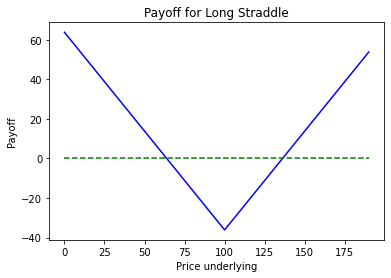

In [29]:
call = option("call", S=CURRENT_PRICE, K=CURRENT_PRICE, T=T, vol=VOL, r=RF)
put = option("put", S=CURRENT_PRICE, K=CURRENT_PRICE, T=T, vol=VOL, r=RF)
show_payoff("Long Straddle", [call, put])

### Covered Call

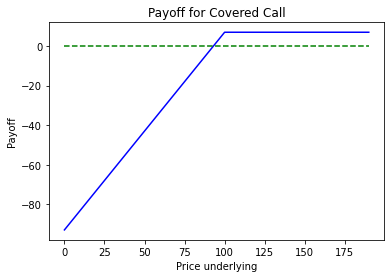

In [30]:
synthetic_stock_call = option("call", S=CURRENT_PRICE, K=CURRENT_PRICE, T=T, vol=VOL, r=RF)
synthetic_stock_put = option("put", S=CURRENT_PRICE, K=CURRENT_PRICE, T=T, vol=VOL, r=RF)
call = option("call", S=CURRENT_PRICE, K=CURRENT_PRICE, T=T, vol=VOL, r=RF)
show_payoff("Covered Call", [synthetic_stock_call, -synthetic_stock_put, -call])    

### Bear Put Spread

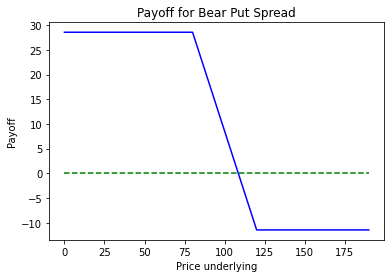

In [31]:
put_higher_strike = option("put", S=CURRENT_PRICE, K=CURRENT_PRICE + 20, T=T, vol=VOL, r=RF)
put_lower_strike = option("put", S=CURRENT_PRICE, K=CURRENT_PRICE - 20, T=T, vol=VOL, r=RF)
show_payoff("Bear Put Spread", [put_higher_strike, -put_lower_strike])

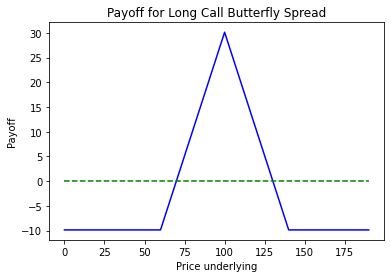

In [32]:
call_in_the_money = option("put", S=CURRENT_PRICE, K=CURRENT_PRICE - 40, T=T, vol=VOL, r=RF)
call_at_the_money = option("put", S=CURRENT_PRICE, K=CURRENT_PRICE, T=T, vol=VOL, r=RF)
call_out_of_the_money = option("put", S=CURRENT_PRICE, K=CURRENT_PRICE + 40, T=T, vol=VOL, r=RF)
show_payoff("Long Call Butterfly Spread", [call_in_the_money, -call_at_the_money, -call_at_the_money, call_out_of_the_money])
